<a href="https://colab.research.google.com/github/milnico/masterAI4HU/blob/main/Lezione7_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron

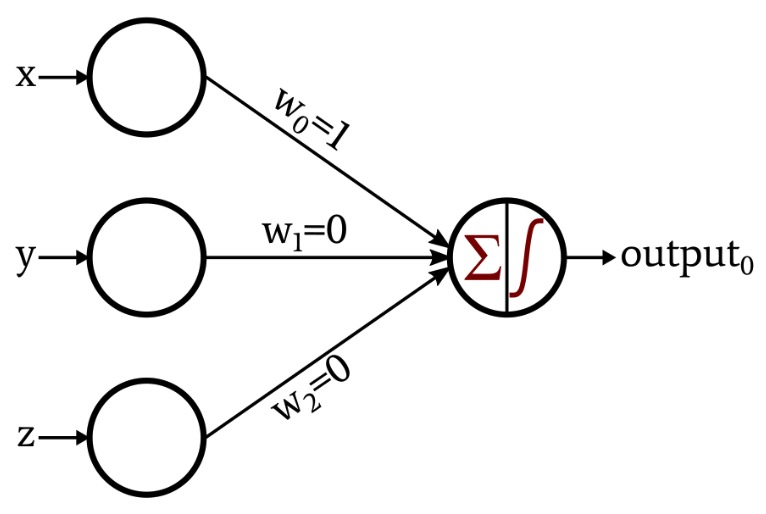

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(6,4))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()
def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = np.shape(X)
    
    # Initializing parameters(weights) to zeros.
    # n+1 in 1 for the bias term.
    weights = np.zeros((n+1,1))
    
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            
            x_i = np.insert(x_i, 0, 1).reshape(1,n+1)
            
            # Calculating prediction/hypothesis.
            net_output = step_func(np.dot(x_i,weights))
            
            # Updating if the example is misclassified.
            if (np.squeeze(net_output) - y[idx]) != 0:
                
                weights -= lr*((net_output-y[idx] )*x_i.T)
                
                
        
    return weights


def plot_decision_boundary(X, weights):
    
    # X --> Inputs
    # weights --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([np.min(X[:,0]), np.max(X[:,0])])
    m = -weights[1,0]/weights[2,0]
    c = -weights[0,0]/weights[2,0]

    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(6,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

w0 = np.random.random((np.shape(X)[1]+1,1))
plot_decision_boundary(X, w0)
w = perceptron(X, y, 0.5, 10)
print(np.shape(w))
plot_decision_boundary(X, w)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,preprocessing
from tqdm import tqdm
train_inputs, train_targets = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=3,cluster_std=0.4,
                           random_state=2)



enc = preprocessing.OneHotEncoder()
enc.fit(train_targets.reshape(len(train_targets),1))
#  Transform
onehotlabels = enc.transform(train_targets.reshape(len(train_targets),1)).toarray()

#Plotting

plt.plot(train_inputs[:, 0][train_targets == 0], train_inputs[:, 1][train_targets == 0], 'r^')
plt.plot(train_inputs[:, 0][train_targets == 1], train_inputs[:, 1][train_targets == 1], 'bs')
plt.plot(train_inputs[:, 0][train_targets == 2], train_inputs[:, 1][train_targets == 2], 'g*')
plt.show()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

def sigmoid(x):
    return 1/(1+np.exp(-x))

def step_function(x):
    return np.where(x<=0,0,1)

class NN(object):
    def __init__(self,inputs):
        self.inputs = inputs
        self.h =3#len(inputs)
        self.li = len(inputs[0])
        self.wi = (2*np.random.random((self.li,self.h)))-1
        self.lr = 0.05
        

    def predict(self,inp):
        
        s1=step_function(np.dot(inp,self.wi))
        #s2=sigmoid(np.dot(s1,self.wh))
        return s1


    def train(self,outputs,epochs): 
        for epoch in tqdm(range(epochs)):
          #print(epoch)
          # looping for every example.
          loss = []
          for i,x in enumerate(self.inputs):
              
              # Insering 1 for bias, X0 = 1.
              #print(self.inputs[self.batch*i:self.batch*(i+1)])
              #print(np.shape(self.inputs[self.batch*i:self.batch*(i+1)]))
              #input("jje")
              l0 = x.reshape((1,3))
              
              
              l1=step_function(np.dot(l0,self.wi))
              error = l1 - outputs[i].reshape(1,3)
              loss.append(np.mean(error))
              
              self.wi -= self.lr*np.dot(l0.T,error)
          
          #print(np.mean(loss))
train_inputs = np.insert(train_inputs,2,1,axis=1)
net = NN(train_inputs)          
pred = net.predict(train_inputs)
pred = np.argmax(pred,axis=1)


plt.plot(train_inputs[:, 0][pred == 0], train_inputs[:, 1][pred == 0], 'r^')
plt.plot(train_inputs[:, 0][pred == 1], train_inputs[:, 1][pred == 1], 'bs')
plt.plot(train_inputs[:, 0][pred == 2], train_inputs[:, 1][pred == 2], 'g*')
plt.show()



net.train(onehotlabels,1000)

pred = net.predict(train_inputs)
pred = np.argmax(pred,axis=1)


plt.plot(train_inputs[:, 0][pred == 0], train_inputs[:, 1][pred == 0], 'r^')
plt.plot(train_inputs[:, 0][pred == 1], train_inputs[:, 1][pred == 1], 'bs')
plt.plot(train_inputs[:, 0][pred == 2], train_inputs[:, 1][pred == 2], 'g*')
plt.show()